# Date Fruit  Classification


### In this project, we will train date fruit varieties. To do this, we will first scan the images in the folder containing the date fruit images, then reduce their size and normalize them, and then train them with deep learning.
### Finally, we will re-train the images with Transfer Learning.

<a href='https://www.kaggle.com/datasets/wadhasnalhamdan/date-fruit-image-dataset-in-controlled-environment?select=Sokari' target=_blank>You can find the data file here</a>

<img src=https://www.ilimge.com/uploads/galeri/gorsel/hurma-cesitleri-png-2hfF.png width='400'>

In [1]:
#pip install opencv-python

In [2]:
import cv2
import pandas as pd
import os

In [3]:
labels = ['Ajwa','Galaxy','Medjool','Meneifi','Nabtat Ali','Rutab','Shaishe','Sokari','Sugaey']
img_path = 'hurmalar/'

In [4]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [5]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [6]:
df.tail(10)

,img,label
1648,hurmalar/Sugaey/Sugaey Date (7).JPG,Sugaey
1649,hurmalar/Sugaey/Sugaey Date (103).JPG,Sugaey
1650,hurmalar/Sugaey/Sugaey Date (90).JPG,Sugaey
1651,hurmalar/Sugaey/Sugaey Date (115).JPG,Sugaey
1652,hurmalar/Sugaey/Sugaey Date (28).JPG,Sugaey
1653,hurmalar/Sugaey/Sugaey Date (142).JPG,Sugaey
1654,hurmalar/Sugaey/Sugaey Date (53).JPG,Sugaey
1655,hurmalar/Sugaey/Sugaey Date (139).JPG,Sugaey
1656,hurmalar/Sugaey/Sugaey Date (12).JPG,Sugaey
1657,hurmalar/Sugaey/Sugaey Date (45).JPG,Sugaey


In [7]:
d={'Ajwa':0,'Galaxy':1,'Medjool':2,'Meneifi':3,'Nabtat Ali':4,'Rutab':5,'Shaishe':6,'Sokari':7,'Sugaey':8}

In [8]:
df['encode_label']=df['label'].map(d)

In [9]:
df.sample(5)

,img,label,encode_label
883,hurmalar/Nabtat Ali/Nabtat Ali Date (94).JPG,Nabtat Ali,4
665,hurmalar/Meneifi/Meneifi Date (195).JPG,Meneifi,3
1216,hurmalar/Shaishe/Shaishe Date (7).JPG,Shaishe,6
286,hurmalar/Galaxy/Galaxy Date (24).JPG,Galaxy,1
422,hurmalar/Medjool/Medjool Date (68).JPG,Medjool,2


In [10]:
import numpy as np

In [11]:
df['encode_label'].value_counts()

encode_label
7    264
3    232
1    190
4    177
0    175
6    171
8    168
5    146
2    135
Name: count, dtype: int64

In [12]:
import matplotlib.pyplot as plt

In [13]:
image=cv2.imread(str(df['img'][55]))

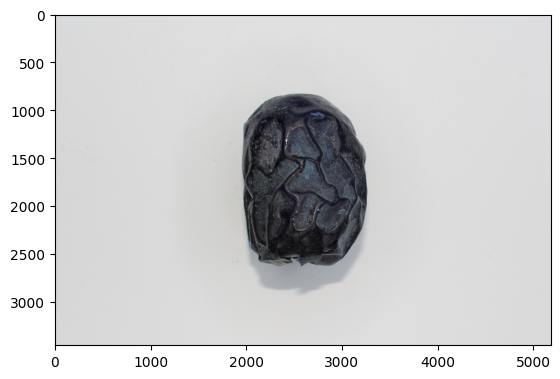

In [14]:
plt.imshow(image);

In [15]:
x=[]
for img in df['img']:
    img=cv2.imread(img)
    img=cv2.resize(img,(50,50)) 
    img=img/255.0    
    x.append(img)

In [16]:
x=np.array(x)

In [17]:
x

array([[[[0.8627451 , 0.85882353, 0.86666667],
         [0.86666667, 0.8627451 , 0.87058824],
         [0.85882353, 0.86666667, 0.87058824],
         ...,
         [0.88627451, 0.88627451, 0.88627451],
         [0.8745098 , 0.88235294, 0.88627451],
         [0.88627451, 0.88235294, 0.89019608]],

        [[0.8627451 , 0.85882353, 0.86666667],
         [0.8745098 , 0.86666667, 0.87058824],
         [0.86666667, 0.8627451 , 0.87058824],
         ...,
         [0.88627451, 0.88627451, 0.88627451],
         [0.88235294, 0.87843137, 0.88627451],
         [0.88627451, 0.87843137, 0.88627451]],

        [[0.85882353, 0.85490196, 0.8627451 ],
         [0.8627451 , 0.86666667, 0.8627451 ],
         [0.8627451 , 0.87058824, 0.8745098 ],
         ...,
         [0.88235294, 0.88235294, 0.89019608],
         [0.88627451, 0.88235294, 0.89019608],
         [0.88235294, 0.88235294, 0.89019608]],

        ...,

        [[0.83137255, 0.82745098, 0.83529412],
         [0.83529412, 0.83137255, 0.83921569]

In [18]:
y=df['encode_label']

In [19]:
y.value_counts()

encode_label
7    264
3    232
1    190
4    177
0    175
6    171
8    168
5    146
2    135
Name: count, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [23]:
model = Sequential()
model.add(Input(shape=(50,50, 3)))


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model. add (BatchNormalization ())
model.add(Conv2D(84, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(120, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(9, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=50,verbose=1)

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.2780 - loss: 2.4602 - val_accuracy: 0.1596 - val_loss: 2.2299
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.7361 - loss: 0.7057 - val_accuracy: 0.2289 - val_loss: 2.0215
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.8256 - loss: 0.4431 - val_accuracy: 0.3705 - val_loss: 1.8268
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.8618 - loss: 0.4111 - val_accuracy: 0.3886 - val_loss: 1.7652
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.9176 - loss: 0.2285 - val_accuracy: 0.2952 - val_loss: 1.6147
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9098 - loss: 0.2592 - val_accuracy: 0.7861 - val_loss: 1.2789
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9301 - loss: 0.1945 - val_accuracy: 0.6536 - val_loss: 1.2766
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.9151 - loss: 0.2404 - val_accuracy: 0.

In [25]:
loss,accuracy=model.evaluate(x_test,y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9299 - loss: 0.3885


In [26]:
accuracy

0.9246987700462341

In [27]:
tahmin=model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [28]:
model.save('hurma.h5')

In [29]:
import matplotlib.pyplot as plt

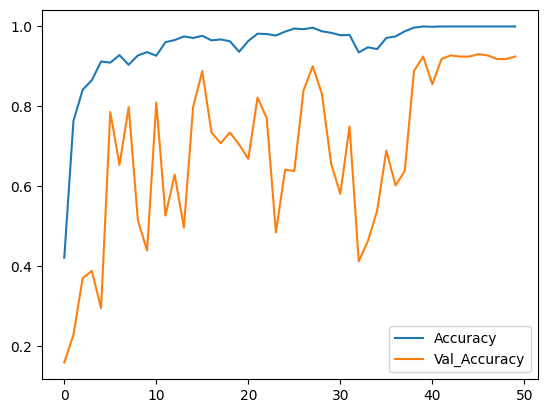

In [30]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [ ]:
loss_f=pd.DataFrame(history.history)

In [ ]:
loss_f.plot()

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [32]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 37,  1,  0,  0,  0,  0,  0],
       [ 0,  2,  0, 48,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 22,  0,  0,  1,  5],
       [ 0,  0,  0,  3,  1, 22,  0,  0,  1],
       [ 0,  0,  0,  1,  1,  0, 41,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1, 38,  1],
       [ 0,  0,  0,  1,  2,  1,  0,  0, 24]])

In [33]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

In [34]:
import seaborn as sns

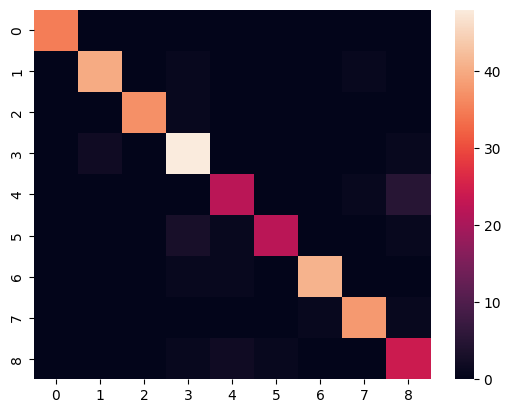

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [36]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.95      0.95      0.95        42
           2       1.00      0.97      0.99        38
           3       0.87      0.94      0.91        51
           4       0.85      0.79      0.81        28
           5       0.96      0.81      0.88        27
           6       0.98      0.95      0.96        43
           7       0.95      0.95      0.95        40
           8       0.75      0.86      0.80        28

    accuracy                           0.92       332
   macro avg       0.92      0.91      0.92       332
weighted avg       0.93      0.92      0.93       332



**Transfer Learning**

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout,BatchNormalization, Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50

In [8]:
data_dir='hurmalar'
img_width,img_heigth=224,224  

train_datagen=ImageDataGenerator(rescale=1/255, validation_split=.20) 

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_heigth),
                                class_mode='categorical', subset='training')

test_datagen=ImageDataGenerator(rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_heigth),
                                class_mode='categorical', subset='validation') 

base_model=VGG16(weights='imagenet', input_shape=(img_width,img_heigth,3),include_top=False) 

model=Sequential()

model.add(base_model)                
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(9,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=1,validation_data=test_datagenerator)

Found 1329 images belonging to 9 classes.
Found 329 images belonging to 9 classes.


/Users/salihbekdemir/Desktop/dersler/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-04-07 20:08:20.988366: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8
2024-04-07 20:08:27.800817: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


42/42 ━━━━━━━━━━━━━━━━━━━━ 420s 10s/step - accuracy: 0.2693 - loss: 7.5418 - val_accuracy: 0.8116 - val_loss: 0.6213


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         9,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,815,773 (350.25 MB)

 Trainable params: 25,700,361 (98.04 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 51,400,724 (196.08 MB)

In [21]:
from tensorflow.keras.models import save_model

In [26]:
model.save('model.keras')


 ### In this lesson, deep learning shows accuracy: 0.9299 - loss: 0.3885, transfer learning shows accuracy: 0.2693 - loss: 7.5418 - val_accuracy: 0.8116 - val_loss: 0.6213